In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Assumptions
- The fleet of cars the company uses are designed to handle E10 fuel. Cars that are not designed to use this type of fuel will experience engine failure with continued use. [Source](https://www.westwoodmotorgroup.co.uk/what-is-e10-fuel/#:~:text=But%20using%20E10%20petrol%20in,that%20shouldn't%20take%20it) [Source 2](https://birchperformance.co.uk/blogs/news/top-three-potential-e10-fuel-problems)
- Since the company is based on Europe, we are using the metric system of km and liters etc.
- Refill liters and	refill gas columns represent a visit to the petrol station to refill
- all the rows are in chronological order


## Findings

The original hypothesis: "going green and being modern can be very expensive"
I would reject this hypothesis. From the analysis of the available thus far, I see no compelling reason to keep using the more expensive 98 unleaded petrol over the E10.

- The E10 uses about .029 less liters per km than the 98. While that seems small, after 100 trips that is already a reduction of 2.9 liters and as the business grows, those liters will continue to add up.
- The data shows the E10 needed to be refilled about 144 km later than the 98, meaning less stops to fill up which can translate to more time for client pick ups.
- Finally, the analysis did not find any significant performance impact by switching to the E10 vs the 98, and outside factors like temperature or weather conditions did not show any significant differences either.

## Cleaning and Initial Exploration

In [2]:
#the excel version was the better one to work with, the csv has the same info as the excel version
data =  pd.read_excel('data/measurements2.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [3]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
data.describe()

# boolean categorical: rain, ac, sun
# continuous numerical: distance, consume, speed, temp_inside, temp_outside, refill_liters

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [5]:
data.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
383    False
384    False
385    False
386    False
387    False
Length: 388, dtype: bool

In [6]:
data.columns
data.columns = data.columns.str.replace(' ','_').str.lower()

In [29]:
#here are the columns with null values
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
snow               0
dtype: int64

In [8]:
#filling null values in the temp_inside column with the mode for that column
mode = data['temp_inside'].mode()
mode

data['temp_inside'].fillna(mode[0], inplace=True)

0    21.5
Name: temp_inside, dtype: float64

In [11]:
""" I compared the specials column with sun and ac. 
The sun, ac and rain columns as booleans are more helpful for deeper analysis than the specials.
I don't want to lose the data related to snow so I created a new boolean column for that"""

data.specials.value_counts()
data.loc[data['sun'] == 1]
data.loc[data['ac'] == 1]


data['snow'] = data['specials'].astype(str).apply(lambda x: 1 if 'snow' in x else 0)

data = data.drop(columns='specials')

In [12]:
#these two columns are mostly null

""" I am not going to fill the nulls for refill_liters or refill_gas because, if the data set is a chronological order 
of trip as I have assummed, the values in these rows represent the number of times the car needed to be refilled for trip.
If I filled the nulls I would be assuming every trip needed a refuel."""

data['refill_liters'].value_counts()
data['refill_gas'].value_counts()

data.loc[data['refill_gas'] == 'SP98'] #8 visits
data.loc[data['refill_gas'] == 'E10']  #5 visits


""" Assuming that the refill_gas column represents the number of times your team has visited the 
gas station over a determined period of time, it seems that the SP98 required more visits."""

' Assuming that the refill_gas column represents the number of times your team has visited the \ngas station over a determined period of time, it seems that the SP98 required more visits.'

In [13]:
# looking at the rows where refill_liters is not null.
data.loc[data['refill_liters'].isna() == False].describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill_liters,snow
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.0
mean,31.830769,4.476923,41.230769,21.807692,9.846154,0.0,0.230769,0.0,37.115385,0.0
std,41.098893,0.671011,13.217122,0.693375,4.810512,0.0,0.438529,0.0,8.587282,0.0
min,5.400000,3.300000,24.000000,20.000000,1.000000,0.0,0.000000,0.0,10.000000,0.0
25%,12.100000,4.200000,32.000000,21.500000,7.000000,0.0,0.000000,0.0,37.600000,0.0
50%,18.300000,4.500000,42.000000,22.000000,10.000000,0.0,0.000000,0.0,38.000000,0.0
75%,28.000000,4.900000,46.000000,22.000000,12.000000,0.0,0.000000,0.0,39.000000,0.0
max,162.700000,5.500000,75.000000,23.000000,17.000000,0.0,1.000000,0.0,45.000000,0.0


In [14]:
#saving cleaned data to csv before doing more exploration
data.to_csv('data/cleaned_consumption.csv', index=False)

In [15]:
""" making 2 separate data frames for gas types so I can compare their info"""
e10 = data.loc[data['gas_type'] == 'E10']
sp98 = data.loc[data['gas_type'] == 'SP98']

In [16]:
e10.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill_liters,snow
count,160.000000,160.000000,160.000000,157.000000,160.000000,160.000000,160.000000,160.000000,5.000000,160.000000
mean,21.096250,4.931250,43.506250,21.917197,10.118750,0.043750,0.100000,0.075000,39.600000,0.006250
std,20.307234,0.900956,14.077949,0.659854,6.392185,0.205181,0.300942,0.264218,3.056959,0.079057
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000,37.700000,0.000000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000,38.000000,0.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000,38.300000,0.000000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000,39.000000,0.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000,45.000000,1.000000


In [17]:
sp98.describe()

# slightly less average distance, consumption and speed

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill_liters,snow
count,228.000000,228.000000,228.000000,219.000000,228.000000,228.000000,228.000000,228.000000,8.000000,228.000000
mean,18.639912,4.899123,40.820175,21.938356,12.228070,0.100877,0.140351,0.087719,35.562500,0.013158
std,24.179598,1.118408,13.170122,1.201906,7.271373,0.301829,0.348115,0.283509,10.672787,0.114201
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000,37.150000,0.000000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000,37.650000,0.000000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000,39.500000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,1.000000


In [18]:
e10.shape # 160 trips recorded
e10.distance.sum() # a sum of 3375.4 km recorded
e10.consume.sum() # 789.0 liters consumed

e10_per_km = e10.consume.sum()/e10.distance.sum()

print(f'The E10 gasoline consumed appprox. {round(e10_per_km,3)} liters per km.')

"""remember, earlier we found that during the study period the E10 required 5 refill visits"""

print(f'The E10 gasoline needed to be refilled approx. every {e10.distance.sum()/5}km')

The E10 gasoline consumed appprox. 0.234 liters per km.
The E10 gasoline needed to be refilled approx. every 675.08km


In [19]:
sp98.shape #228 trips recorded
sp98.distance.sum() # a sum of 4249.9 km recorded
sp98.consume.sum() # 1117.0 liters consumed

sp98_per_km = sp98.consume.sum()/sp98.distance.sum()

print(f'The SP98 gasoline consumed appprox. {round(sp98_per_km,3)} liters per km.')

"""remember, earlier we found that during the study period the 98 required 8 refill visits"""

print(f'The SP98 gasoline needed to be refilled approx. every {sp98.distance.sum()/8}km') 

The SP98 gasoline consumed appprox. 0.263 liters per km.
The SP98 gasoline needed to be refilled approx. every 531.2375km


## Visualizations and analysis

C:\Users\NessaJay\AppData\Local\Temp\ipykernel_11452\3771601633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x='gas_type', y='consume', palette="coolwarm");


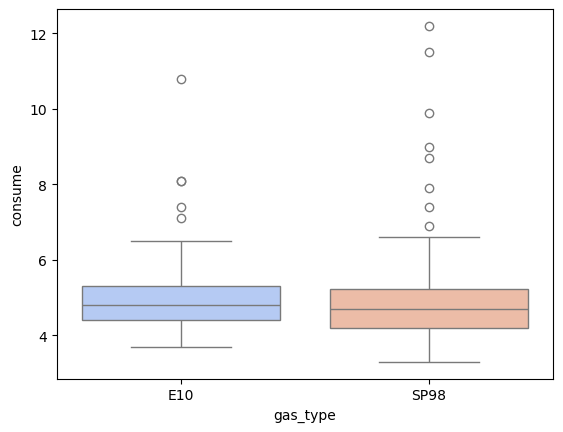

In [20]:
# the medians are very similar but consumption of SP98 gas has a larger range from min to max
sns.boxplot(data, x='gas_type', y='consume', palette="coolwarm");

In [21]:
# continuous numerical: distance, consume, speed, temp_inside, temp_outside

df_numerical= data.drop(columns=['ac','sun','rain'])

In [22]:
df_numerical= data.drop(columns=['ac','sun','rain','refill_liters', 'refill_gas','gas_type'])
df_numerical

,distance,consume,speed,temp_inside,temp_outside,snow
0,28.0,5.0,26,21.5,12,0
1,12.0,4.2,30,21.5,13,0
2,11.2,5.5,38,21.5,15,0
3,12.9,3.9,36,21.5,14,0
4,18.5,4.5,46,21.5,15,0
...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0
384,16.1,4.3,38,25.0,31,0
385,16.0,3.8,45,25.0,19,0
386,15.4,4.6,42,25.0,31,0


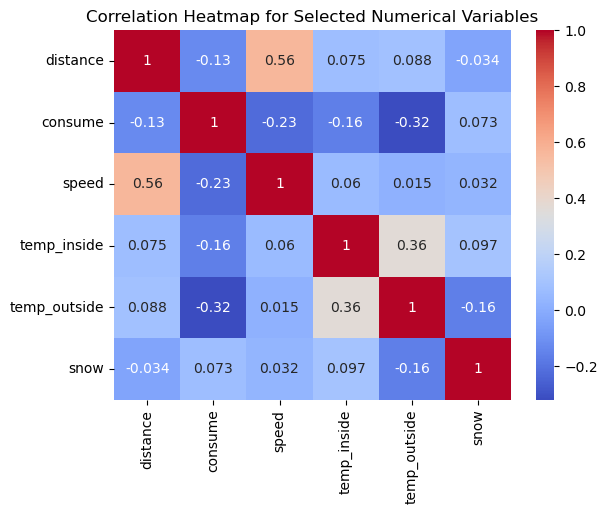

In [23]:
correlation_matrix = df_numerical.corr()

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

"""most notable correlations between distance and speed, and temperature outside and consumption but no strong corrolations
either way"""

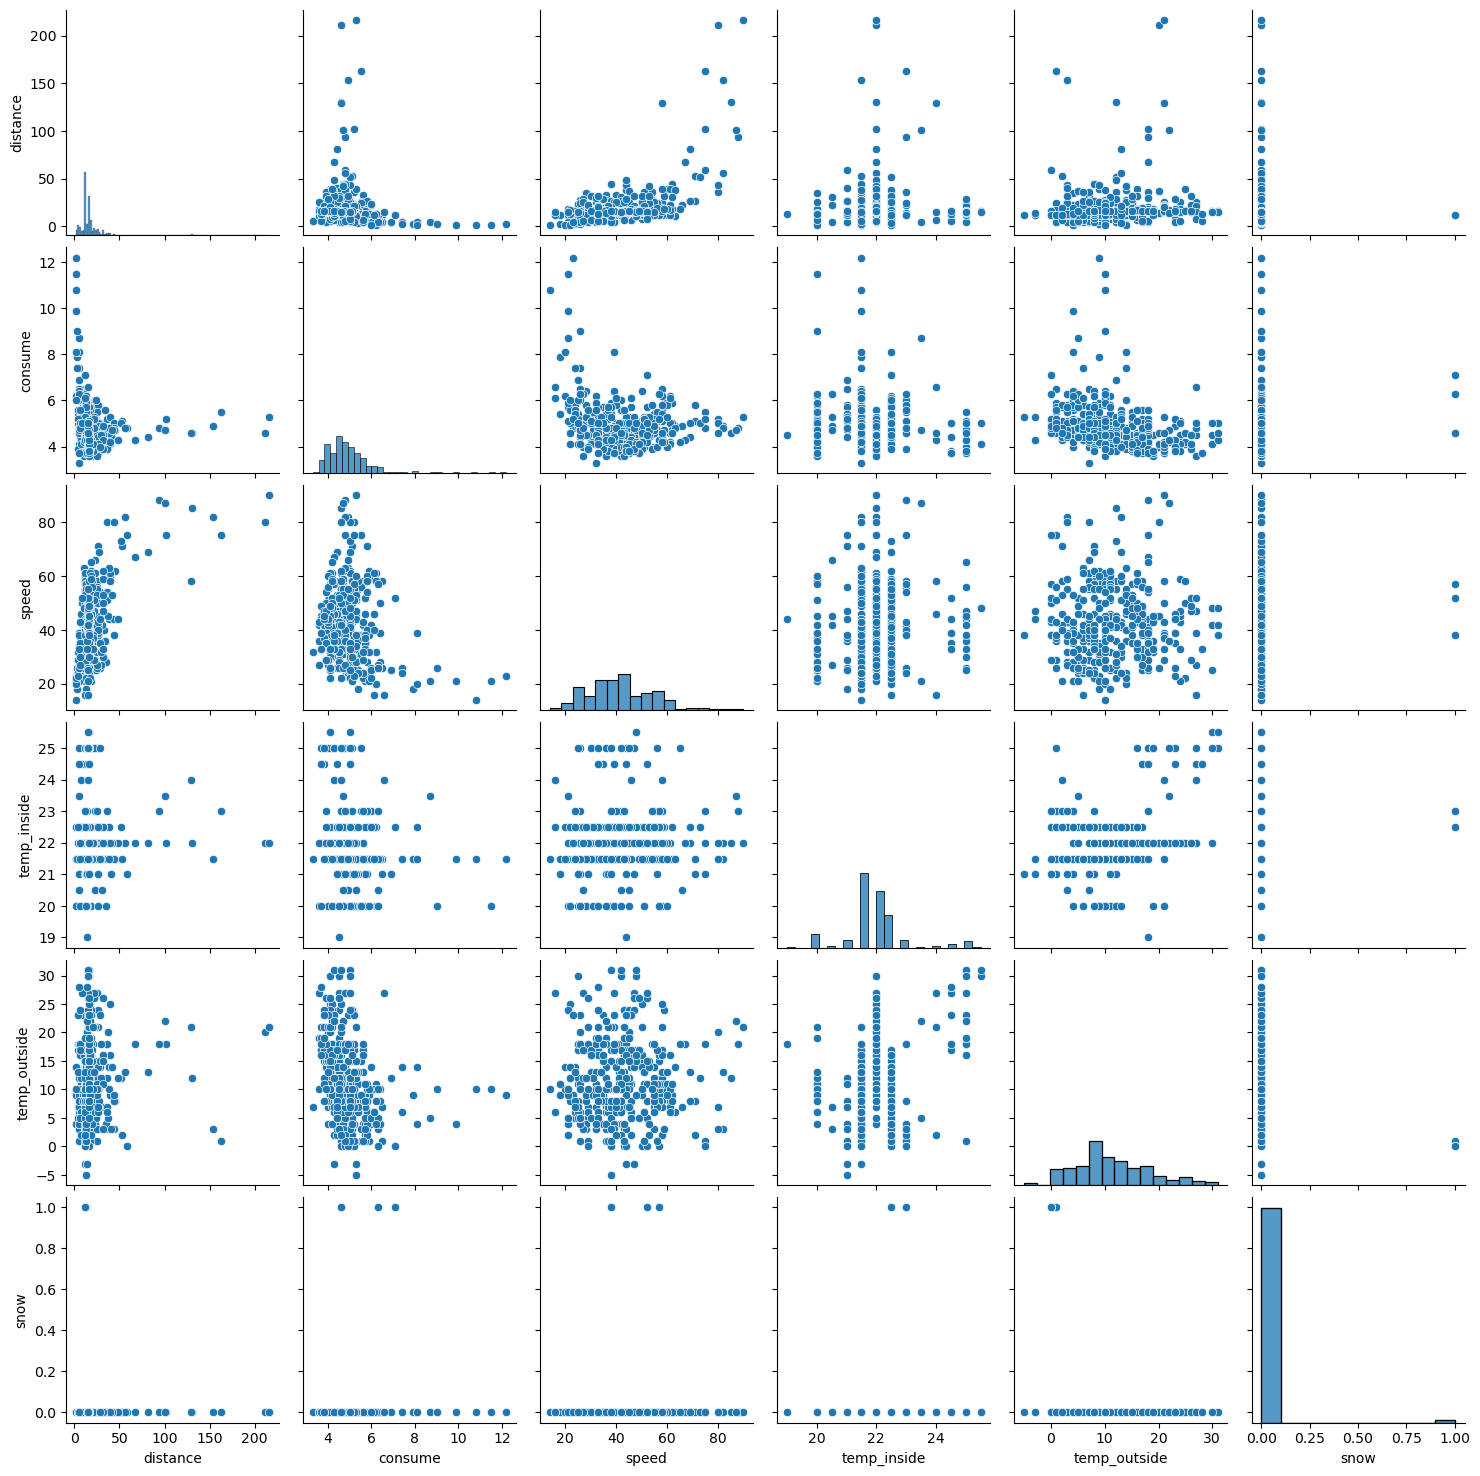

In [24]:
"""scatter plots confirm correlations seen above, slight trends, but nothing I would say is 
too strong in one direction or another """

sns.pairplot(df_numerical)